# Udacity Data Wrangle Project : WeRateDogs

## Introduction
Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

This project consists of,

    -Gathering data
    -Assessing data
    -Cleaning data
    -Storing, analyzing, and visualizing your wrangled data
    -Reporting on 
        1) Data wrangling efforts 
        2) Data analysis and visualizations

In [1]:
# Import required libraries 
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
from IPython.display import Image 

## Gathering Data

This project use data from below sources:
   ##### a) Twitter Archive File
   ##### b) Image Predictions File
   ##### c) Data from Twitter API

### a) Twitter Archive File

In [2]:
df_twitter_arch = pd.read_csv('twitter-archive-enhanced.csv', sep=',')
df_twitter_arch.head(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [3]:
df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### b) Image Predictions File

In [4]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
df_image_pred = pd.read_csv('image_predictions.tsv', sep='\t')
df_image_pred.head(5)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [5]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#Source:https://re-thought.com/how-to-suppress-scientific-notation-in-pandas/
#pd.reset_option('display.float_format', lambda x: '%.3f' % x)
df_image_pred.describe()

tweet_id  img_num  p1_conf  p2_conf  p3_conf
count               2075.000 2075.000 2075.000 2075.000 2075.000
mean  738451357852529152.000    1.204    0.595    0.135    0.060
std    67852033330235664.000    0.562    0.271    0.101    0.051
min   666020888022790144.000    1.000    0.044    0.000    0.000
25%   676483507139540992.000    1.000    0.364    0.054    0.016
50%   711998809858043904.000    1.000    0.588    0.118    0.049
75%   793203448525178880.000    1.000    0.844    0.196    0.092
max   892420643555336192.000    4.000    1.000    0.488    0.273

### c) Data from Twitter API

In [7]:
#df_tweet_json = pd.read_json('tweet_json.txt', lines=True,encoding="utf-8")
#df_tweet_json.head(5)

# Above is giving error even after trying different encodings , 
# hence trying different approach

In [8]:
temp = [] # temporary list 
with open('tweet-json.txt') as file:
    for line in file:
        tweet = (json.loads(line))
        
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        
        temp.append({
                    'tweet_id' : tweet_id,
                    'retweet_count' : retweet_count,
                    'favorite_count' : favorite_count,
                  })


In [9]:
# convert temp list to dataframe
df_tweet_json=pd.DataFrame(temp)
df_tweet_json.head(5)

favorite_count  retweet_count            tweet_id
0           39467           8853  892420643555336193
1           33819           6514  892177421306343426
2           25461           4328  891815181378084864
3           42908           8964  891689557279858688
4           41048           9774  891327558926688256

In [10]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Assessing data



We have 3 main data frames now:<br>
     - df_twitter_arch
     - df_image_pred
     - df_tweet_json

In [11]:
#Taking backup of orignal dataframe
df_main_twitter_arch=df_twitter_arch.copy()
df_main_image_pred=df_image_pred.copy()
df_main_tweet_json=df_tweet_json.copy()


In [12]:
df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
df_twitter_arch.describe()

tweet_id  in_reply_to_status_id    in_reply_to_user_id  \
count               2356.000                 78.000                 78.000   
mean  742771590321692416.000 745507917855750784.000  20141706360873220.000   
std    68567047444761000.000  75824920044192880.000 125279666255236304.000   
min   666020888022790144.000 665814696700723200.000           11856342.000   
25%   678398938214475776.000 675741911993464832.000          308637448.750   
50%   719627934716235776.000 703870840226598912.000         4196983835.000   
75%   799337304954252288.000 825780371286566912.000         4196983835.000   
max   892420643555336192.000 886266357075128320.000 840547864354918400.000   

         retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count                181.000                   181.000          2356.000   
mean  772039961038007040.000     12416983653017598.000            13.126   
std    62369278105055600.000     95992535331517504.000            45.877   
min   666104133288665088.000                783214.000             0.000   
25%   718631497683582976.000            4196983835.000            10.000   
50%   780465709297995776.000            4196983835.000            11.000   
75%   820314633777061888.000            4196983835.000            12.000   
max   887473957103951872.000    787461778435289088.000          1776.000   

       rating_denominator  
count            2356.000  
mean               10.455  
std                 6.745  
min                 0.000  
25%                10.000  
50%                10.000  
75%                10.000  
max               170.000

In [14]:
df_twitter_arch.head(100)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0   892420643555336193                    nan                  nan   
1   892177421306343426                    nan                  nan   
2   891815181378084864                    nan                  nan   
3   891689557279858688                    nan                  nan   
4   891327558926688256                    nan                  nan   
5   891087950875897856                    nan                  nan   
6   890971913173991426                    nan                  nan   
7   890729181411237888                    nan                  nan   
8   890609185150312448                    nan                  nan   
9   890240255349198849                    nan                  nan   
10  890006608113172480                    nan                  nan   
11  889880896479866881                    nan                  nan   
12  889665388333682689                    nan                  nan   
13  889638837579907072                    nan                  nan   
14  889531135344209921                    nan                  nan   
15  889278841981685760                    nan                  nan   
16  888917238123831296                    nan                  nan   
17  888804989199671297                    nan                  nan   
18  888554962724278272                    nan                  nan   
19  888202515573088257                    nan                  nan   
20  888078434458587136                    nan                  nan   
21  887705289381826560                    nan                  nan   
22  887517139158093824                    nan                  nan   
23  887473957103951883                    nan                  nan   
24  887343217045368832                    nan                  nan   
25  887101392804085760                    nan                  nan   
26  886983233522544640                    nan                  nan   
27  886736880519319552                    nan                  nan   
28  886680336477933568                    nan                  nan   
29  886366144734445568                    nan                  nan   
..                 ...                    ...                  ...   
70  879008229531029506                    nan                  nan   
71  878776093423087618                    nan                  nan   
72  878604707211726852                    nan                  nan   
73  878404777348136964                    nan                  nan   
74  878316110768087041                    nan                  nan   
75  878281511006478336                    nan                  nan   
76  878057613040115712                    nan                  nan   
77  877736472329191424                    nan                  nan   
78  877611172832227328                    nan                  nan   
79  877556246731214848                    nan                  nan   
80  877316821321428993                    nan                  nan   
81  877201837425926144                    nan                  nan   
82  876838120628539392                    nan                  nan   
83  876537666061221889                    nan                  nan   
84  876484053909872640                    nan                  nan   
85  876120275196170240                    nan                  nan   
86  875747767867523072                    nan                  nan   
87  875144289856114688                    nan                  nan   
88  875097192612077568                    nan                  nan   
89  875021211251597312                    nan                  nan   
90  874680097055178752                    nan                  nan   
91  874434818259525634                    nan                  nan   
92  874296783580663808                    nan                  nan   
93  874057562936811520                    nan                  nan   
94  874012996292530176                    nan                  nan   
95  873697596434513921  

In [15]:
df_twitter_arch['tweet_id'].nunique()

2356

In [16]:
sum(df_twitter_arch.duplicated())

0

Tweet id is unique which is good.Also we are intrested in original tweets hence reply and rewteets columns are not needed and can be deleted.

In [17]:
df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Timestamp column does not have proper datatype , it should be datetime.

In [18]:
df_twitter_arch['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [19]:
df_twitter_arch['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

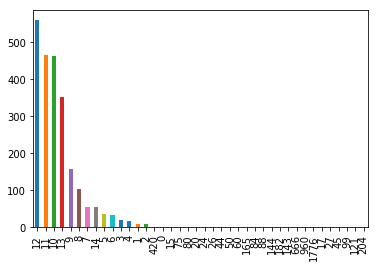

In [20]:
df_twitter_arch['rating_numerator'].value_counts().plot(kind='bar')

There seems some extreme values in rating numerator such as 1776,960... 

We can remove them or replace them with average of top 10 ratings.

But keeping them same as would not be using rating column in visualisation.

In [21]:
df_twitter_arch['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [22]:
df_twitter_arch['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

Seems like majority of denominator is 10, hence rest of the other can be replaced with 10.

In [23]:
df_twitter_arch['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [24]:
df_twitter_arch['name'].value_counts()

None          745
a              55
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Tucker         10
Lola           10
Penny          10
Winston         9
Bo              9
Sadie           8
the             8
Daisy           7
Toby            7
Bailey          7
Buddy           7
an              7
Bella           6
Leo             6
Stanley         6
Scout           6
Milo            6
Jax             6
Oscar           6
Koda            6
Rusty           6
Jack            6
Dave            6
Larry           5
             ... 
Sweets          1
Edmund          1
River           1
Ziva            1
Tebow           1
Blipson         1
Link            1
Wiggles         1
Shooter         1
Newt            1
Emmie           1
Puff            1
Amy             1
life            1
Christoper      1
Dex             1
Jeb             1
Billl           1
Kendall         1
Jareld          1
Beebop          1
Geno            1
Jackie          1
Major           1
Julius    

There seems some english words in Name column. We will replace them with None.
All of the none's can be later replaced with NaN.

In [25]:
df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Dog stage columns will can be combined into one. This will change grain of th dataframe , hence only required rows will be kept and duplicate rows will be dropped.This is tidiness issue.

Now we will check the data quality each of the columns of dog stages.

In [26]:
df_twitter_arch['doggo'].value_counts()                     

None     2259
doggo      97
Name: doggo, dtype: int64

In [27]:
df_twitter_arch['floofer'].value_counts()  

None       2346
floofer      10
Name: floofer, dtype: int64

In [28]:
df_twitter_arch['pupper'].value_counts() 

None      2099
pupper     257
Name: pupper, dtype: int64

In [29]:
df_twitter_arch['puppo'].value_counts() 

None     2326
puppo      30
Name: puppo, dtype: int64

Here None can be relaced with NaN which is a quality issue.

In [30]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Here there are less tweets than in the df_twitter_arch (2075 Vs 2356).

Similary jpg_url contains images. Hence we keep tweets with valid images in df_twitter_arch

In [31]:
df_image_pred.head(100)

tweet_id                                          jpg_url  \
0   666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1   666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2   666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3   666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4   666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5   666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6   666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7   666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8   666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9   666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10  666063827256086533  https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11  666071193221509120  https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12  666073100786774016  https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13  666082916733198337  https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14  666094000022159362  https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15  666099513787052032  https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16  666102155909144576  https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17  666104133288665088  https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18  666268910803644416  https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19  666273097616637952  https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20  666287406224695296  https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21  666293911632134144  https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22  666337882303524864  https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23  666345417576210432  https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24  666353288456101888  https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25  666362758909284353  https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26  666373753744588802  https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27  666396247373291520  https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28  666407126856765440  https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29  666411507551481857  https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
..                 ...                                              ...   
70  667192066997374976  https://pbs.twimg.com/media/CUJXpRBXIAAN0yz.jpg   
71  667200525029539841  https://pbs.twimg.com/media/CUJfVMPXIAAgbue.jpg   
72  667211855547486208  https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg   
73  667369227918143488  https://pbs.twimg.com/media/CUL4xR9UkAEdlJ6.jpg   
74  667393430834667520  https://pbs.twimg.com/media/CUMOyd3XIAAl13H.jpg   
75  667405339315146752  https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg   
76  667435689202614272  https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg   
77  667437278097252352  https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg   
78  667443425659232256  https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg   
79  667453023279554560  https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg   
80  667455448082227200  https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg   
81  667470559035432960  https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg   
82  667491009379606528  https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg   
83  667495797102141441  https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg   
84  667502640335572993  https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg   
85  667509364010450944  https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg   
86  667517642048163840  https://pbs.twimg.com/media/CUN_wiBUkAAakT0.jpg   
87  667524857454854144  https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg   
88  667530908589760512  https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg   
89  667534815156183040  https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg   
90  667538891197542400  https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg   
91  667544320556335104  https://pbs.twi

In [32]:
df_image_pred['tweet_id'].nunique()

2075

There are uniques tweets in this database.

In [33]:
df_image_pred.jpg_url.value_counts()

https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg    2
https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg                                            2
https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg                                            2
https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg                                            2
https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg                                            2
https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg                                            2
https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg                                            2
https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg                       

In [34]:
df_image_pred['jpg_url'].nunique()

2009

So Images are duplicate but tweets are different. 
We can delete tweets with duplciate images retaining any one of the tweets. 
However since tweets are unique will not do anything.

In [35]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
df_image_pred['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
Maltese_dog                   18
beagle                        18
Eskimo_dog                    18
teddy                         18
Shetland_sheepdog             18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [37]:
df_image_pred['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
collie                             27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
chow                               20
miniature_pinscher                 20
toy_terrier                        20
Samoyed                            20
malinois                           20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [38]:
df_image_pred['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
toy_poodle                        29
Pekinese                          29
Pomeranian                        29
Pembroke                          27
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
d

Column values does not look in same case.Its a quality issue.

In [39]:
df_tweet_json.head(10)

favorite_count  retweet_count            tweet_id
0           39467           8853  892420643555336193
1           33819           6514  892177421306343426
2           25461           4328  891815181378084864
3           42908           8964  891689557279858688
4           41048           9774  891327558926688256
5           20562           3261  891087950875897856
6           12041           2158  890971913173991426
7           56848          16716  890729181411237888
8           28226           4429  890609185150312448
9           32467           7711  890240255349198849

In [40]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


No issues in this data rame. In end we will merge this data frame with other two ,so that we will have single source of data.

### Quality:

##### 1) Incorrect Dognames and repalcing none with NaN
##### 2) Keep only original tweets and delete replies and retweet
##### 3) No retweets and reply columns are needed
##### 4) Timestamp should be datetime instead of object
##### 5) Denominator should be 10
##### 6) Dog Stages Columns contain None , which should be converted to ' ' (this will be later converted to single column)
##### 7) Drop original tweets with no images
##### 8) Dog breed column values are not in same case

### Tidiness:

##### 1) Need single column for dog stage rather than multiple
##### 2) Merge all cleaned data frames to get single main dataframe

## Cleaning

### A) Quality Issues

#### DEFINE

###### 1) Incorrect Dognames and replacing none with NaN.

#### CODE

In [41]:
df_twitter_arch['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

By visual assesment we get below list which have invalid dog names:
    
['such','a','quite','not','mad','very', 'this','unacceptable', 'all',
 'just', 'infuriating','by','an','my', 'the','actually','officially']

Here we notice that these are all lower case letters , lets check all lower case letters.


In [42]:
df_twitter_arch.name.loc[(df_twitter_arch['name'].str.islower())].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [43]:

#Now we will replace all of these to 'None' and later all None to NAN

#This function will return None if name value is lower case , 
#later we apply this function  on our dataset

#Reference:https://stackoverflow.com/questions/57745212/how-to-replace-nan-values-of-a-column-based-on-certain-values-of-other-column?rq=1

def InvalidDogNames(value):
    """ Will return None if argument passed is in lower case else the actual argument """
    if value['name'][0].islower() == True:
        return 'None'
    else:
        return value['name']
   

In [44]:
#here we apply above function to our dataframe
df_twitter_arch['name'] = df_twitter_arch.apply(InvalidDogNames, axis = 1)
#Replace None with NAN
df_twitter_arch['name'] = df_twitter_arch['name'].replace('None', np.NaN)

#### TEST

In [45]:
df_twitter_arch['name'].value_counts()

Charlie       12
Lucy          11
Cooper        11
Oliver        11
Tucker        10
Penny         10
Lola          10
Winston        9
Bo             9
Sadie          8
Toby           7
Bailey         7
Buddy          7
Daisy          7
Stanley        6
Milo           6
Bella          6
Jack           6
Scout          6
Leo            6
Koda           6
Oscar          6
Rusty          6
Jax            6
Dave           6
Chester        5
Bentley        5
George         5
Sammy          5
Alfie          5
              ..
Sweets         1
Edmund         1
River          1
Ziva           1
Tebow          1
Craig          1
Anna           1
Blipson        1
Chesney        1
Butters        1
Emmie          1
Puff           1
Amy            1
Christoper     1
Dex            1
Billl          1
Shooter        1
Kendall        1
Beebop         1
Geno           1
Jackie         1
Major          1
Julius         1
Reagan         1
Hanz           1
Andy           1
Jareld         1
Link          

#### DEFINE
##### 2) Keep only original tweets and delete replies and retweet

In [46]:
df_twitter_arch.count()

tweet_id                      2356
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id            181
retweeted_status_user_id       181
retweeted_status_timestamp     181
expanded_urls                 2297
rating_numerator              2356
rating_denominator            2356
name                          1502
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
dtype: int64

#### CODE

In [47]:
df_twitter_arch=df_twitter_arch[df_twitter_arch.retweeted_status_id.isnull()]
df_twitter_arch=df_twitter_arch[df_twitter_arch.in_reply_to_user_id.isnull()]

#### TEST

In [48]:
df_twitter_arch.count()

tweet_id                      2097
in_reply_to_status_id            0
in_reply_to_user_id              0
timestamp                     2097
source                        2097
text                          2097
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp       0
expanded_urls                 2094
rating_numerator              2097
rating_denominator            2097
name                          1390
doggo                         2097
floofer                       2097
pupper                        2097
puppo                         2097
dtype: int64

#### DEFINE
##### 3) No retweets and reply columns are needed

#### CODE

In [49]:
df_twitter_arch.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 
                              'retweeted_status_timestamp', 'in_reply_to_status_id',
                               'in_reply_to_user_id', 'in_reply_to_user_id'], 
                                 axis = 1, inplace=True)

#### TEST

In [50]:
df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1390 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### DEFINE
##### 4) Timestamp should be datetime instead of object

#### CODE 

In [51]:
df_twitter_arch['timestamp'] = pd.to_datetime(df_twitter_arch['timestamp'])

#### TEST 

In [52]:
df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1390 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


#### DEFINE
##### 5) Denominator should be 10

#### CODE

In [53]:
df_twitter_arch.rating_denominator.value_counts()

10     2080
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [54]:
df_twitter_arch.loc[df_twitter_arch.rating_denominator!=10]

tweet_id           timestamp  \
433   820690176645140481 2017-01-15 17:52:40   
516   810984652412424192 2016-12-19 23:06:23   
902   758467244762497024 2016-07-28 01:00:57   
1068  740373189193256964 2016-06-08 02:41:38   
1120  731156023742988288 2016-05-13 16:15:54   
1165  722974582966214656 2016-04-21 02:25:47   
1202  716439118184652801 2016-04-03 01:36:11   
1228  713900603437621249 2016-03-27 01:29:02   
1254  710658690886586372 2016-03-18 02:46:49   
1274  709198395643068416 2016-03-14 02:04:08   
1351  704054845121142784 2016-02-28 21:25:30   
1433  697463031882764288 2016-02-10 16:51:59   
1635  684222868335505415 2016-01-05 04:00:18   
1662  682962037429899265 2016-01-01 16:30:13   
1779  677716515794329600 2015-12-18 05:06:23   
1843  675853064436391936 2015-12-13 01:41:41   
2335  666287406224695296 2015-11-16 16:11:11   

                                                 source  \
433   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1662  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
433   The floofs have been released I repeat the flo...   
516   Meet Sam. She smiles 24/7 &amp; secretly aspir...   
902   Why does this never happen at my front door......   
1068  After so many requests, this is Bretagne. She ...   
1120  Say hello to this unbelievably well behaved sq...   
1165  Happy 4/20 from the squad! 13/10 for all https...   
1202  This is Bluebert. He just saw that both #Final...   
1228  Happy Saturday here's 9 puppers on a bench. 99...   
1254  Here's a brigade of puppers. All look very pre...   
1274  From left to right:\nCletus, Jerome, Alejandro...   
1351  Here is a whole flock of puppers.  60/50 I'll ...   
1433  Happy Wednesday here's a bucket of pups. 44/40...   
1635  Someone help the girl is being mugged. Several...   
1662  This is Darrel. He just robbed a 7/11 and is i...   
1779  IT'S PUPPERGEDDON. Total of 144/120 ...I think...   
1843  Here we have an entire platoon of puppers. Tot...   
2335  This is an Albanian 3 1/2 legged  Episcopalian...   

                                          expanded_urls  rating_numerator  \
433   https://twitter.com/dog_rates/status/820690176...                84   
516   https://www.gofundme.com/sams-smile,https://tw...                24   
902   https://twitter.com/dog_rates/status/758467244...               165   
1068  https://twitter.com/dog_rates/status/740373189...                 9   
1120  https://twitter.com/dog_rates/status/731156023...               204   
1165  https://twitter.com/dog_rates/status/722974582...                 4   
1202  https://twitter.com/dog_rates/status/716439118...                50   
1228  https://twitter.com/dog_rates/status/713900603...                99   
1254  https://twitter.com/dog_rates/status/710658690...                80   
1274  https://twitter.com/dog_rates/status/709198395...                45   
1351  https://twitter.com/dog_rates/status/704054845...                60   
1433  https://twitter.com/dog_rates/status/697463031...                44   
1635  https://twitter.co

In [55]:
def DenomCorrection(value):
    """ Will return 10 if rating_denominator <> 10 else actual rating_denominator """
    if value.rating_denominator!=10:
        return 10
    else:
        return value['rating_denominator']

In [56]:
#DenomCorrection

df_twitter_arch['rating_denominator'] = df_twitter_arch.apply(DenomCorrection, axis = 1)
df_twitter_arch.rating_denominator.value_counts()

10    2097
Name: rating_denominator, dtype: int64

#### TEST

In [57]:
#Test if we have denominator <>10
df_twitter_arch.loc[df_twitter_arch.rating_denominator!=10]

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

#### DEFINE 
#### 6) Dog Stages Columns contain None , which should be converted to ' ' (this will be later converted to single column)

#### CODE

In [58]:
df_twitter_arch['doggo'].value_counts()

None     2014
doggo      83
Name: doggo, dtype: int64

In [59]:
df_twitter_arch['floofer'].value_counts()

None       2087
floofer      10
Name: floofer, dtype: int64

In [60]:
df_twitter_arch['pupper'].value_counts()

None      1867
pupper     230
Name: pupper, dtype: int64

In [61]:
df_twitter_arch['puppo'].value_counts()

None     2073
puppo      24
Name: puppo, dtype: int64

In [62]:
df_twitter_arch['doggo']   =df_twitter_arch.doggo.replace('None','')
df_twitter_arch['floofer'] =df_twitter_arch.floofer.replace('None','')
df_twitter_arch['pupper']  =df_twitter_arch.pupper.replace('None','')
df_twitter_arch['puppo']   =df_twitter_arch.puppo.replace('None','')

In [63]:
#pd.asdasdas

#### TEST 

In [64]:
df_twitter_arch['doggo'].value_counts()

         2014
doggo      83
Name: doggo, dtype: int64

In [65]:
df_twitter_arch['floofer'].value_counts()

           2087
floofer      10
Name: floofer, dtype: int64

In [66]:
df_twitter_arch['pupper'].value_counts()

          1867
pupper     230
Name: pupper, dtype: int64

In [67]:
df_twitter_arch['puppo'].value_counts()

         2073
puppo      24
Name: puppo, dtype: int64

#### DEFINE 
##### 7) Drop original tweets with no images

#### CODE

In [68]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [69]:
#Creating a temp df by left joining df_twitter_arch and df_image_pred , 
#this will help us to give tweets with no images

temp = pd.merge(df_twitter_arch, df_image_pred, how = 'left', on = ['tweet_id'])

In [70]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 23 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1390 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    197

In [71]:
#Now there are 126 tweets with no images which we will delete
temp['jpg_url'].isnull().sum()

126

In [72]:
#Repalcing df_twitter_arch with above temp df which contains tweets with images
df_twitter_arch=temp[temp['jpg_url'].notna()]

#### TEST

In [73]:
#Test 1 after replacing , number of rows have been reduced
df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 23 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1349 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    197

In [74]:
#Test 2 , Are there any tweets with no images in main twitter archive data frame
df_twitter_arch['jpg_url'].isnull().sum()

0

#### DEFINE
##### 8) Predicted dog breed column values are not in same case 

#### CODE

In [75]:
df_twitter_arch['p1'].head()

0         orange
1      Chihuahua
2      Chihuahua
3    paper_towel
4         basset
Name: p1, dtype: object

In [76]:
# Convert Values in lower case
df_twitter_arch['p1']=df_twitter_arch['p1'].str.lower()
df_twitter_arch['p2']=df_twitter_arch['p2'].str.lower()
df_twitter_arch['p3']=df_twitter_arch['p3'].str.lower()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

#### TEST

In [77]:
df_twitter_arch['p1'].str.islower().unique(),df_twitter_arch['p2'].str.islower().unique(),df_twitter_arch['p3'].str.islower().unique()

(array([ True], dtype=bool),
 array([ True], dtype=bool),
 array([ True], dtype=bool))

In [78]:
df_twitter_arch['p1'].value_counts()

golden_retriever               137
labrador_retriever              94
pembroke                        88
chihuahua                       78
pug                             54
chow                            41
samoyed                         40
pomeranian                      38
toy_poodle                      37
malamute                        29
cocker_spaniel                  27
french_bulldog                  26
chesapeake_bay_retriever        23
seat_belt                       21
miniature_pinscher              21
german_shepherd                 20
siberian_husky                  20
staffordshire_bullterrier       19
maltese_dog                     18
shetland_sheepdog               18
eskimo_dog                      18
beagle                          17
teddy                           17
cardigan                        17
shih-tzu                        17
rottweiler                      16
italian_greyhound               16
kuvasz                          15
lakeland_terrier    

In [79]:
df_twitter_arch['p2'].value_counts()

labrador_retriever                95
golden_retriever                  82
cardigan                          73
chihuahua                         43
chesapeake_bay_retriever          40
french_bulldog                    39
pomeranian                        38
toy_poodle                        36
siberian_husky                    33
cocker_spaniel                    32
miniature_poodle                  32
eskimo_dog                        27
beagle                            27
collie                            26
pembroke                          24
kuvasz                            24
italian_greyhound                 22
pekinese                          21
american_staffordshire_terrier    20
miniature_pinscher                20
chow                              20
malinois                          20
norwegian_elkhound                19
boston_bull                       19
toy_terrier                       19
pug                               17
staffordshire_bullterrier         17
s

In [80]:
df_twitter_arch['p3'].value_counts()

labrador_retriever                76
chihuahua                         57
golden_retriever                  45
eskimo_dog                        36
kelpie                            33
kuvasz                            31
staffordshire_bullterrier         30
chow                              30
beagle                            29
toy_poodle                        29
cocker_spaniel                    29
pekinese                          28
pomeranian                        27
pembroke                          26
malamute                          25
french_bulldog                    25
great_pyrenees                    25
chesapeake_bay_retriever          24
american_staffordshire_terrier    23
cardigan                          23
pug                               21
basenji                           20
siberian_husky                    19
bull_mastiff                      19
toy_terrier                       18
boston_bull                       17
shetland_sheepdog                 16
l

### B) Tidiness Issues 

#### DEFINE
##### 1) Need single column for Dog stages rather than multiple

In [81]:
df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 23 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1349 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    197

In [82]:
df_twitter_arch.head(10)

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   
5  891087950875897856 2017-07-29 00:08:17   
6  890971913173991426 2017-07-28 16:27:12   
7  890729181411237888 2017-07-28 00:22:40   
8  890609185150312448 2017-07-27 16:25:51   
9  890240255349198849 2017-07-26 15:59:51   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   
5  <a href="http://twitter.com/download/iphone" r...   
6  <a href="http://twitter.com/download/iphone" r...   
7  <a href="http://twitter.com/download/iphone" r...   
8  <a href="http://twitter.com/download/iphone" r...   
9  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   
5  Here we have a majestic great white breaching ...   
6  Meet Jax. He enjoys ice cream so much he gets ...   
7  When you watch your owner call another dog a g...   
8  This is Zoey. She doesn't want to be one of th...   
9  This is Cassie. She is a college pup. Studying...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   
5  https://twitter.com/dog_rates/status/891087950...                13   
6  https://gofundme.com/ydvmve-surgery-for-jax,ht...                13   
7  https://twitter.com/dog_rates/status/890729181...                13   
8  https://twitter.com/dog_rates/status/890609185...                13   
9  https://twitter.com/dog_rates/status/890240255...                14   

   rating_denominator      name  doggo floofer  ...   img_num  \
0                  10   Phineas                 ...     1.000   
1                  10     Tilly                 ...     1.000   
2                  10    Archie                 ...     1.000   
3                  10     Darla                 ...     1.000   
4                  10  Franklin                 ...     2.000   
5                  10       NaN                 ...     1.000   
6                  10       Jax                 ...     1.000   
7                  10       NaN                 ...     2.000   
8                  10      Zoey                 ...     1.000   
9                  10    Cassie  doggo          ...     1.000   

                         p1 p1_conf  p1_dog                  p2  p2_conf  \
0                    orange   0.097   False               bagel    0.086   
1                 chihuahua   0.324    True            pekinese    0.091   
2                 chihuahua   0.716    True            malamute    0.078   
3               paper_towel   0.170   False  labrador_retriever    0.168   
4                    basset   0.556    True    english_springer    0.226   
5  chesapeake_bay_retriever   0.426    True       irish_terrier    0.116   
6               appenzeller   0.342    True       border_collie    0.199   
7                pomeranian   0.566    True          eskimo_dog    0.178   
8             irish_terrier   0.488    True        irish_setter    0

#### CODE

In [83]:
# Melt the the columns into values
#df_twitter_arch = pd.melt(df_twitter_arch, id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
#       'rating_numerator', 'rating_denominator', 'name', 
#       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
#       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
#                          value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
#                          var_name = 'stages', 
#                          value_name = 'dog_stage')

In [84]:
# merge into column
df_twitter_arch['dog_stage'] = df_twitter_arch['doggo'] + df_twitter_arch['floofer'] + df_twitter_arch['pupper'] + df_twitter_arch['puppo']

# handle multiple stages
df_twitter_arch.loc[df_twitter_arch.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_twitter_arch.loc[df_twitter_arch.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_twitter_arch.loc[df_twitter_arch.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [85]:
df_twitter_arch['dog_stage'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

In [86]:
df_twitter_arch['dog_stage'].value_counts()

                  1668
pupper             201
doggo               63
puppo               22
doggo, pupper        8
floofer              7
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

#### DEFINE
##### 1.1 Dog stage datatype can be changed to category

#### CODE

In [87]:
df_twitter_arch['dog_stage']=df_twitter_arch['dog_stage'].astype('category')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### TEST

In [88]:
df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 24 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1349 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    197

#### DEFINE
##### 2) Merge all cleaned data frames to get single main dataframe

#### CODE

In [89]:
#We have already merged image_predictions and twitter archive dataframes ,
#here we will merge api dataframe into twitter archive 

df_main=pd.merge(df_twitter_arch, df_tweet_json,how = 'inner', on = ['tweet_id'])

#### TEST

In [90]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 26 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1349 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    197

In [91]:
#check data for a sample tweet
df_main.loc[df_main['tweet_id']==869596645499047938]

tweet_id           timestamp  \
98  869596645499047938 2017-05-30 16:49:31   

                                               source  \
98  <a href="http://twitter.com/download/iphone" r...   

                                                 text  \
98  This is Scout. He just graduated. Officially a...   

                                        expanded_urls  rating_numerator  \
98  https://twitter.com/dog_rates/status/869596645...                12   

    rating_denominator   name  doggo floofer      ...      p1_dog  \
98                  10  Scout  doggo              ...        True   

             p2 p2_conf  p2_dog      p3  p3_conf p3_dog dog_stage  \
98  toy_terrier   0.008    True  muzzle    0.006  False     doggo   

    favorite_count retweet_count  
98           16476          3327  

[1 rows x 26 columns]

In [92]:
sum(df_main.duplicated())

0

## Storing data to csv

In [93]:
#Store the cleaned DataFrame in a CSV file
df_main.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 26 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1349 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    197

## Analyzing  and Visualization

#### 1)Top 10 dog breeds with 70% confidence and with an assumption that p1 most correct than p2 and p3.

In [94]:
df_main.head(10)

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   
5  891087950875897856 2017-07-29 00:08:17   
6  890971913173991426 2017-07-28 16:27:12   
7  890729181411237888 2017-07-28 00:22:40   
8  890609185150312448 2017-07-27 16:25:51   
9  890240255349198849 2017-07-26 15:59:51   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   
5  <a href="http://twitter.com/download/iphone" r...   
6  <a href="http://twitter.com/download/iphone" r...   
7  <a href="http://twitter.com/download/iphone" r...   
8  <a href="http://twitter.com/download/iphone" r...   
9  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   
5  Here we have a majestic great white breaching ...   
6  Meet Jax. He enjoys ice cream so much he gets ...   
7  When you watch your owner call another dog a g...   
8  This is Zoey. She doesn't want to be one of th...   
9  This is Cassie. She is a college pup. Studying...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   
5  https://twitter.com/dog_rates/status/891087950...                13   
6  https://gofundme.com/ydvmve-surgery-for-jax,ht...                13   
7  https://twitter.com/dog_rates/status/890729181...                13   
8  https://twitter.com/dog_rates/status/890609185...                13   
9  https://twitter.com/dog_rates/status/890240255...                14   

   rating_denominator      name  doggo floofer      ...      p1_dog  \
0                  10   Phineas                     ...       False   
1                  10     Tilly                     ...        True   
2                  10    Archie                     ...        True   
3                  10     Darla                     ...       False   
4                  10  Franklin                     ...        True   
5                  10       NaN                     ...        True   
6                  10       Jax                     ...        True   
7                  10       NaN                     ...        True   
8                  10      Zoey                     ...        True   
9                  10    Cassie  doggo              ...        True   

                   p2 p2_conf  p2_dog                           p3  p3_conf  \
0               bagel   0.086   False                       banana    0.076   
1            pekinese   0.091    True                     papillon    0.069   
2            malamute   0.078    True                       kelpie    0.031   
3  labrador_retriever   0.168    True                      spatula    0.041   
4    english_springer   0.226    True  german_short-haired_pointer    0.175   
5       irish_terrier   0.116    True              indian_elephant    0.077   
6       border_collie   0.199    True                    ice_lolly    0.194   
7          eskimo_dog   0.178    True                 

In [95]:
df_main['p1_conf'].value_counts()    

0.873    2
0.786    2
0.241    2
0.445    1
0.897    1
0.770    1
0.194    1
0.837    1
0.328    1
0.600    1
0.124    1
0.849    1
0.435    1
0.241    1
1.000    1
0.584    1
0.271    1
0.261    1
0.787    1
0.112    1
0.304    1
0.331    1
0.151    1
0.890    1
0.169    1
0.254    1
0.253    1
0.672    1
0.963    1
0.995    1
        ..
0.620    1
0.786    1
0.573    1
0.557    1
0.483    1
0.271    1
0.449    1
0.661    1
0.738    1
0.754    1
0.433    1
0.735    1
0.315    1
0.516    1
0.749    1
0.665    1
0.720    1
0.762    1
0.849    1
0.493    1
0.585    1
0.854    1
0.408    1
0.423    1
0.929    1
0.482    1
0.998    1
0.240    1
0.910    1
1.000    1
Name: p1_conf, Length: 1968, dtype: int64

In [96]:
# Top 10 Dog Breeds most tweeted with 70% confidence interval
df_main['p1'].loc[(df_main['p1_conf']>=0.7)].value_counts().head(10).plot(kind='bar')
plt.title('Most Popular Dog Breed with 70% prediction confidence')
plt.ylabel('Count')
plt.xlabel('Dog Breed')

Text(0.5,0,'Dog Breed')

Golden Retriever, Pembroke and Labrador Retriever rules the chart here.

#### 2)Top 10 dog breeds without considering confidence and with an assumption that p1 most correct than p2 and p3.

Text(0.5,0,'Dog Breed')

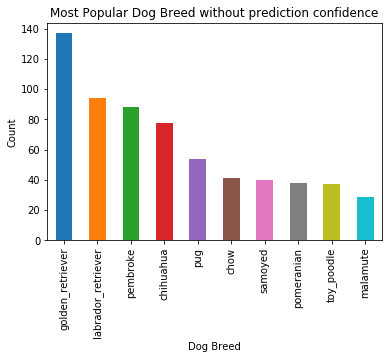

In [97]:
df_main['p1'].value_counts().head(10).plot(kind='bar');
plt.title('Most Popular Dog Breed without prediction confidence')
plt.ylabel('Count')
plt.xlabel('Dog Breed')

However when prediction confidence is not taken in picture breeds such as 
Golden Retriever, Labrador Retriver, Pembroke still rules the chart but Pembroke loses its second position. 

Golden Retriever seems all time fav. dog

#### 3) Popular dog life stages in tweets

In [98]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 26 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1349 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    197

In [99]:
df_main['dog_stage'].loc[(df_main['dog_stage']!='')].value_counts().plot(kind = 'bar')
plt.title('Most Popular Dog Stage in Tweets')
plt.ylabel('Count')
plt.xlabel('Type of Dog Stage')

Text(0.5,0,'Type of Dog Stage')

Pupper is the most popular life stage of dogs in tweets.

#### 4) Top 10 popular dog names

Text(0.5,0,'Dog Name')

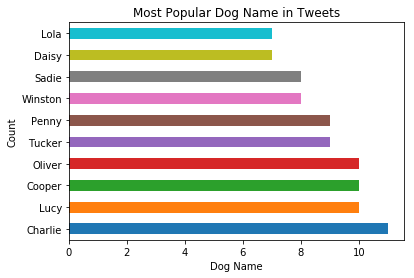

In [100]:
df_main['name'].value_counts().head(10).plot(kind = 'barh')
plt.title('Most Popular Dog Name in Tweets')
plt.ylabel('Count')
plt.xlabel('Dog Name')

Charlie, Lucy and Oliver are most common dog names. 

#### 5)Most favourite and retweeted dog image

In [101]:
#Most favourite Dog Image
pd.set_option('display.max_colwidth', -1)
df_main['jpg_url'].loc[(df_main['favorite_count']==df_main['favorite_count'].max())]

306    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
Name: jpg_url, dtype: object

In [102]:
Image("https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg")

In [103]:
#Most Retweeted Dog Image
pd.set_option('display.max_colwidth', -1)
df_main['jpg_url'].loc[(df_main['retweet_count']==df_main['retweet_count'].max())]

769    https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
Name: jpg_url, dtype: object

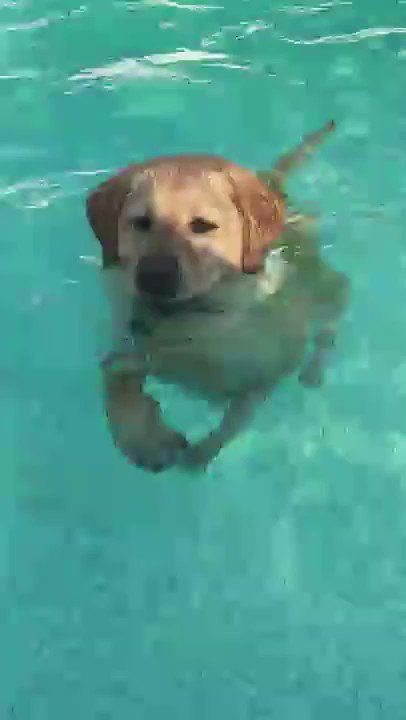

In [104]:
Image("https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg")